In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("Dataset/train.csv")

df.drop('customer_id',axis=1,inplace=True)


In [254]:
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),1d,Male,21,Unmarried partner,...,1~3,4~8,4~8,never,1,1,0,0,1,1
1,Work,Alone,Sunny,80,7AM,Restaurant(<20),2h,Male,21,Single,...,1~3,4~8,1~3,less1,1,0,0,1,0,0
2,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,2h,Female,21,Married partner,...,gt8,4~8,1~3,1~3,1,1,0,0,1,0
3,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,26,Single,...,less1,4~8,1~3,never,1,1,1,0,1,0
4,Home,Alone,Snowy,30,6PM,Coffee House,1d,Male,31,Single,...,less1,4~8,less1,never,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,below21,Single,...,gt8,gt8,gt8,less1,1,1,0,1,0,0
10143,Home,Partner,Sunny,80,6PM,Coffee House,1d,Male,26,Married partner,...,NaN,1~3,1~3,less1,1,0,0,1,0,1
10144,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,1~3,never,never,1,0,0,0,1,1
10145,No Urgent Place,Kid(s),Sunny,30,10PM,Restaurant(20-50),2h,Male,46,Married partner,...,never,1~3,1~3,1~3,1,0,0,0,1,0


In [255]:

dfcolumns = list(df.columns)
dfcolumns

['destination',
 'passanger',
 'weather',
 'temperature',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'has_children',
 'education',
 'occupation',
 'income',
 'car',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp',
 'Y']

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           10147 non-null  object
 1   passanger             10147 non-null  object
 2   weather               10147 non-null  object
 3   temperature           10147 non-null  int64 
 4   time                  10147 non-null  object
 5   coupon                10147 non-null  object
 6   expiration            10147 non-null  object
 7   gender                10147 non-null  object
 8   age                   10147 non-null  object
 9   maritalStatus         10147 non-null  object
 10  has_children          10147 non-null  int64 
 11  education             10147 non-null  object
 12  occupation            10147 non-null  object
 13  income                10147 non-null  object
 14  car                   84 non-null     object
 15  Bar                   10059 non-null

In [257]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,10147.000000,10147.000000,10147.0,10147.000000,10147.000000,10147.000000,10147.000000,10147.000000
mean,63.172366,0.412634,1.0,0.563024,0.119838,0.212181,0.787819,0.568444
std,19.232595,0.492332,0.0,0.496037,0.324788,0.408872,0.408872,0.495318
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [258]:
df.duplicated().sum()

48

In [259]:
df.drop_duplicates(inplace=True)
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),1d,Male,21,Unmarried partner,...,1~3,4~8,4~8,never,1,1,0,0,1,1
1,Work,Alone,Sunny,80,7AM,Restaurant(<20),2h,Male,21,Single,...,1~3,4~8,1~3,less1,1,0,0,1,0,0
2,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,2h,Female,21,Married partner,...,gt8,4~8,1~3,1~3,1,1,0,0,1,0
3,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,26,Single,...,less1,4~8,1~3,never,1,1,1,0,1,0
4,Home,Alone,Snowy,30,6PM,Coffee House,1d,Male,31,Single,...,less1,4~8,less1,never,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,below21,Single,...,gt8,gt8,gt8,less1,1,1,0,1,0,0
10143,Home,Partner,Sunny,80,6PM,Coffee House,1d,Male,26,Married partner,...,NaN,1~3,1~3,less1,1,0,0,1,0,1
10144,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,1~3,never,never,1,0,0,0,1,1
10145,No Urgent Place,Kid(s),Sunny,30,10PM,Restaurant(20-50),2h,Male,46,Married partner,...,never,1~3,1~3,1~3,1,0,0,0,1,0


In [260]:
for i in dfcolumns:
    print()
    print(df[i].value_counts())
    print()




No Urgent Place    5031
Home               2569
Work               2499
Name: destination, dtype: int64


Alone        5767
Friend(s)    2672
Partner       850
Kid(s)        810
Name: passanger, dtype: int64


Sunny    7980
Snowy    1136
Rainy     983
Name: weather, dtype: int64


80    5172
55    3049
30    1878
Name: temperature, dtype: int64


6PM     2571
7AM     2499
10AM    1829
2PM     1613
10PM    1587
Name: time, dtype: int64


Coffee House             3186
Restaurant(<20)          2226
Carry out & Take away    1894
Bar                      1619
Restaurant(20-50)        1174
Name: coupon, dtype: int64


1d    5605
2h    4494
Name: expiration, dtype: int64


Female    5175
Male      4924
Name: gender, dtype: int64


21         2126
26         2029
31         1619
50plus     1427
36         1063
41          877
46          528
below21     430
Name: age, dtype: int64


Married partner      4062
Single               3787
Unmarried partner    1737
Divorced              412
Widowed

#Handle Missing Value

In [261]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     10015
Bar                        88
CoffeeHouse               172
CarryAway                 121
RestaurantLessThan20       96
Restaurant20To50          148
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [262]:
missingValueCol = ['car','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'] 

for i in missingValueCol:
    print()
    print(df[i].value_counts())
    print()




crossover                                   18
Scooter and motorcycle                      18
do not drive                                17
Car that is too old to install Onstar :D    17
Mazda5                                      14
Name: car, dtype: int64


never    4139
less1    2752
1~3      1976
4~8       855
gt8       289
Name: Bar, dtype: int64


less1    2679
1~3      2568
never    2368
4~8      1420
gt8       892
Name: CoffeeHouse, dtype: int64


1~3      3725
4~8      3407
less1    1482
gt8      1244
never     120
Name: CarryAway, dtype: int64


1~3      4284
4~8      2848
less1    1676
gt8      1023
never     172
Name: RestaurantLessThan20, dtype: int64


less1    4865
1~3      2607
never    1684
4~8       579
gt8       216
Name: Restaurant20To50, dtype: int64



In [263]:
# Handle missing value of Car Column
'''# Since Car Column has lot of missing value this column is not giving truthfull insight hence we will 
go ahead and drop the Car Column'''
df.drop('car',axis=1,inplace=True)

In [264]:
# Handle missing value of Bar Column
'''As the 'Bar','CoffeeHouse','CarryAway','RestaurantLessThan20' and 'Restaurant20To50' column is categorical and 
has relatively few missing values, we will proceed by replacing the missing values with the mode.'''

missingValueCol = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'] 

for i in missingValueCol:
    print(df[i].value_counts())
    modeOfColumn = df[i].mode()[0]
    print(modeOfColumn)
    df[i].fillna(modeOfColumn,inplace=True)
    print(df[i].value_counts())
    print()


never    4139
less1    2752
1~3      1976
4~8       855
gt8       289
Name: Bar, dtype: int64
never
never    4227
less1    2752
1~3      1976
4~8       855
gt8       289
Name: Bar, dtype: int64

less1    2679
1~3      2568
never    2368
4~8      1420
gt8       892
Name: CoffeeHouse, dtype: int64
less1
less1    2851
1~3      2568
never    2368
4~8      1420
gt8       892
Name: CoffeeHouse, dtype: int64

1~3      3725
4~8      3407
less1    1482
gt8      1244
never     120
Name: CarryAway, dtype: int64
1~3
1~3      3846
4~8      3407
less1    1482
gt8      1244
never     120
Name: CarryAway, dtype: int64

1~3      4284
4~8      2848
less1    1676
gt8      1023
never     172
Name: RestaurantLessThan20, dtype: int64
1~3
1~3      4380
4~8      2848
less1    1676
gt8      1023
never     172
Name: RestaurantLessThan20, dtype: int64

less1    4865
1~3      2607
never    1684
4~8       579
gt8       216
Name: Restaurant20To50, dtype: int64
less1
less1    5013
1~3      2607
never    1684
4~8    

<AxesSubplot:>

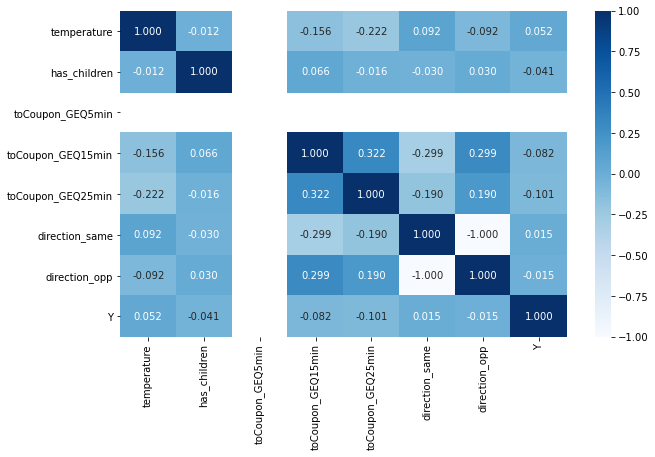

In [265]:
plt.figure(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")


<AxesSubplot:xlabel='age', ylabel='count'>

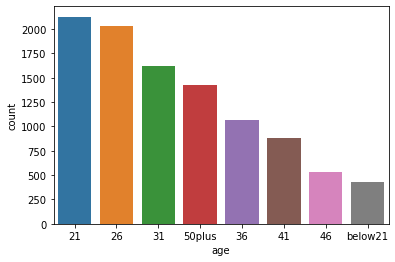

In [266]:
sns.countplot(df['age'])

In [267]:
catCol = ['destination','passanger','weather','temperature','time','coupon','expiration','gender',
          'age','maritalStatus','has_children','Bar','CoffeeHouse',
          'CarryAway','RestaurantLessThan20','Restaurant20To50']
catCol2 = ['education','occupation','income']
numCol = [ 'toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same','direction_opp','Y']
numCol

['toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp',
 'Y']

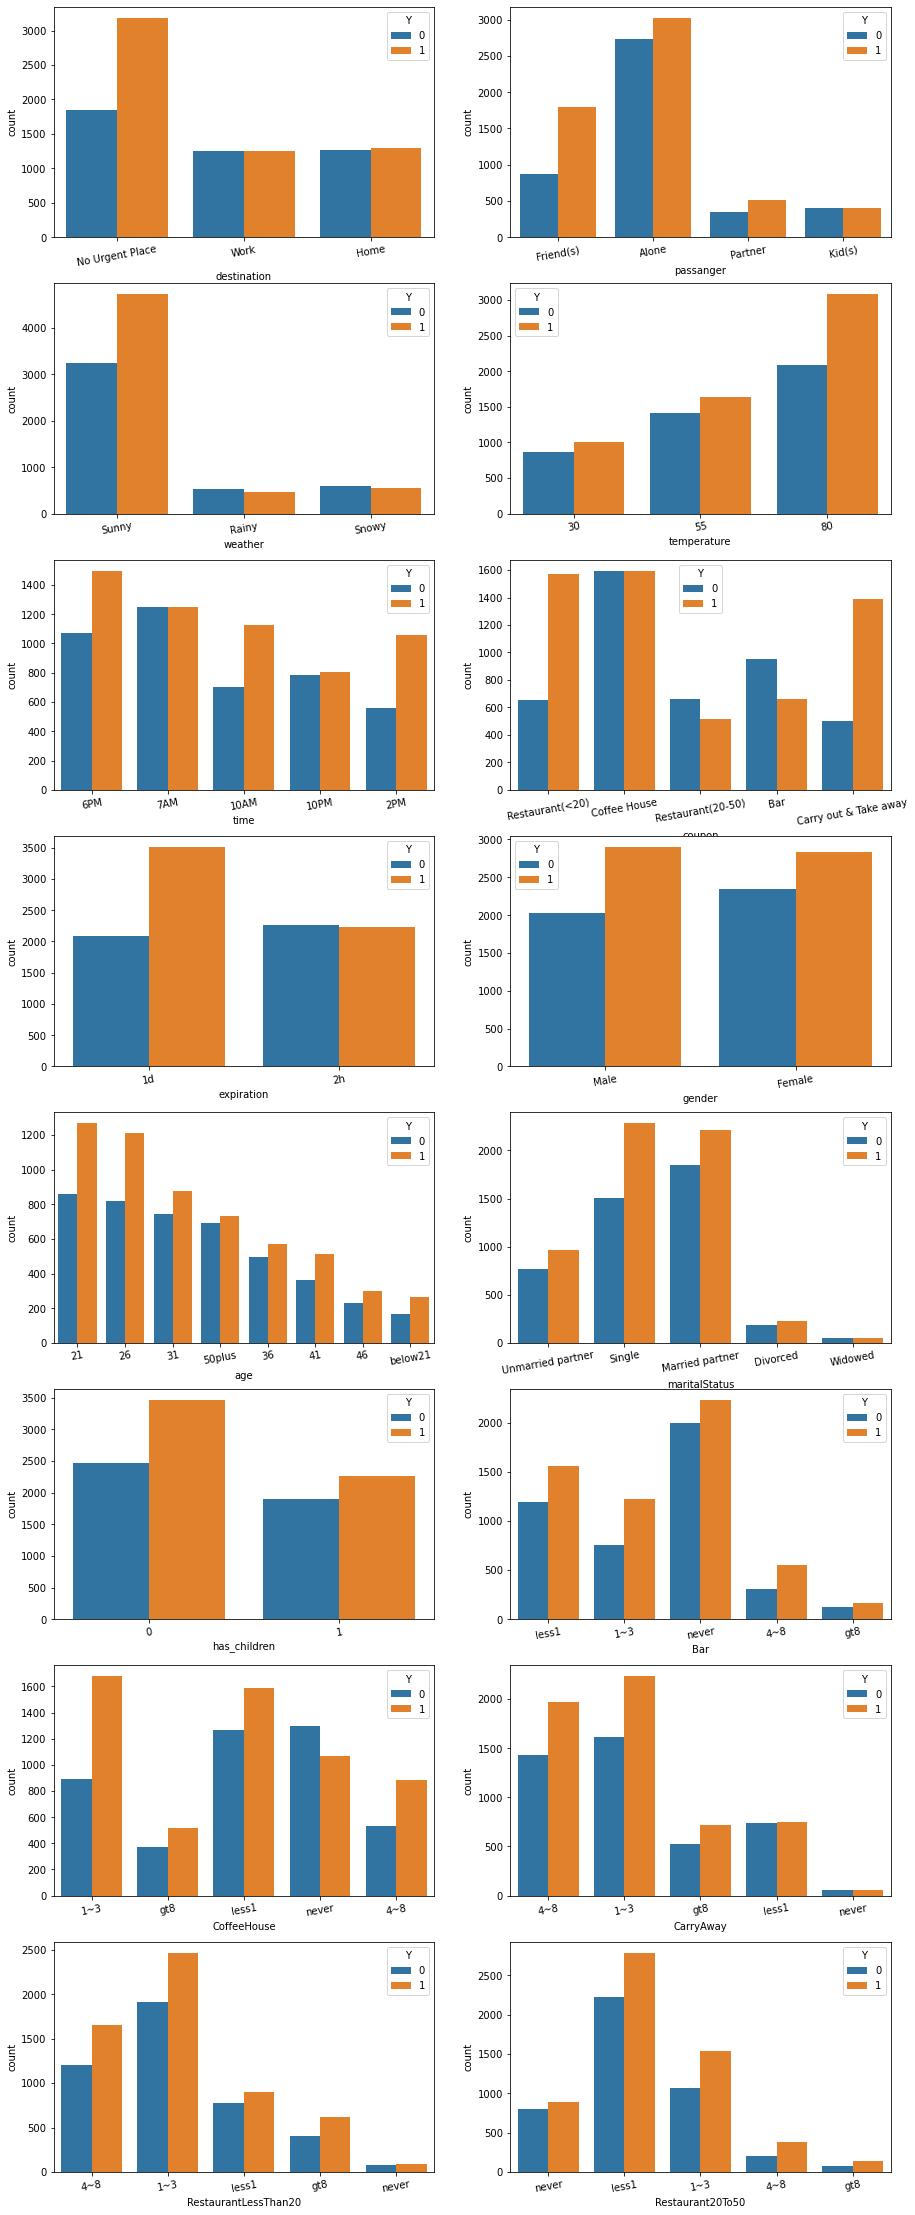

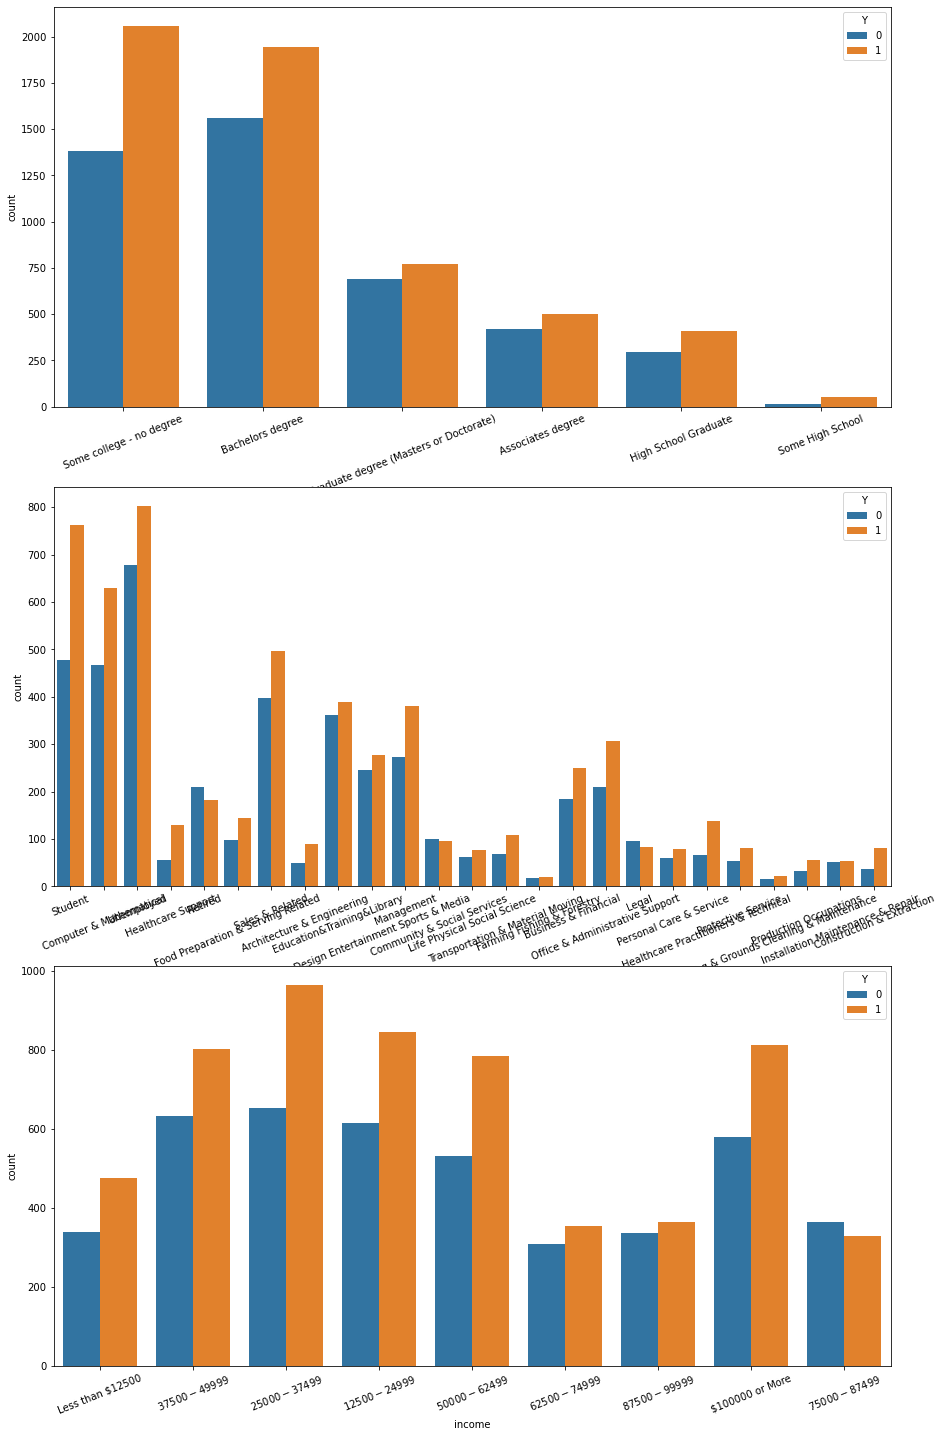

In [268]:

plt.figure(figsize=(15,50))
for i in list(enumerate(catCol)):
    plt.subplot(10,2,i[0]+1)
    sns.countplot(df[i[1]],hue=df['Y'])
    plt.xticks(rotation=10)
plt.show()


plt.figure(figsize=(15,25))
for i in list(enumerate(catCol2)):
    plt.subplot(3,1,i[0]+1)
    sns.countplot(df[i[1]],hue=df['Y'])
    plt.xticks(rotation=22)
plt.show()



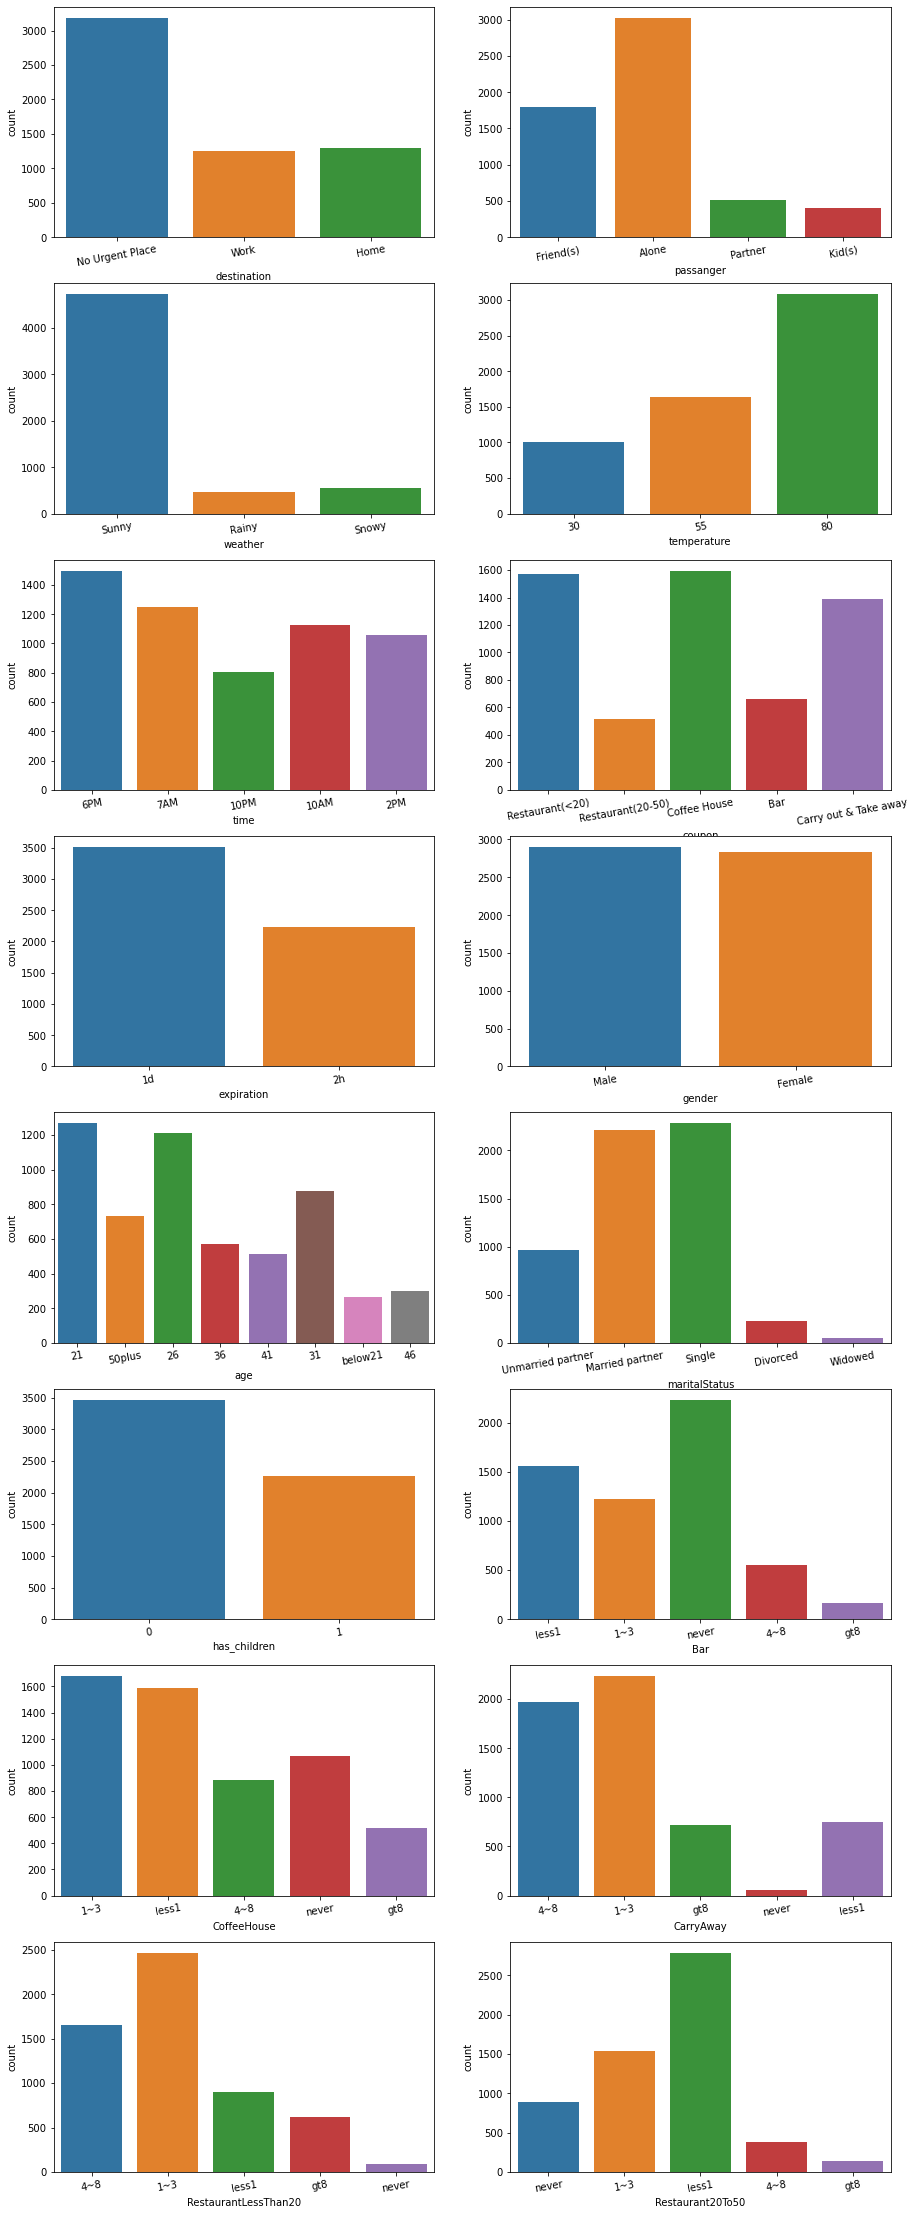

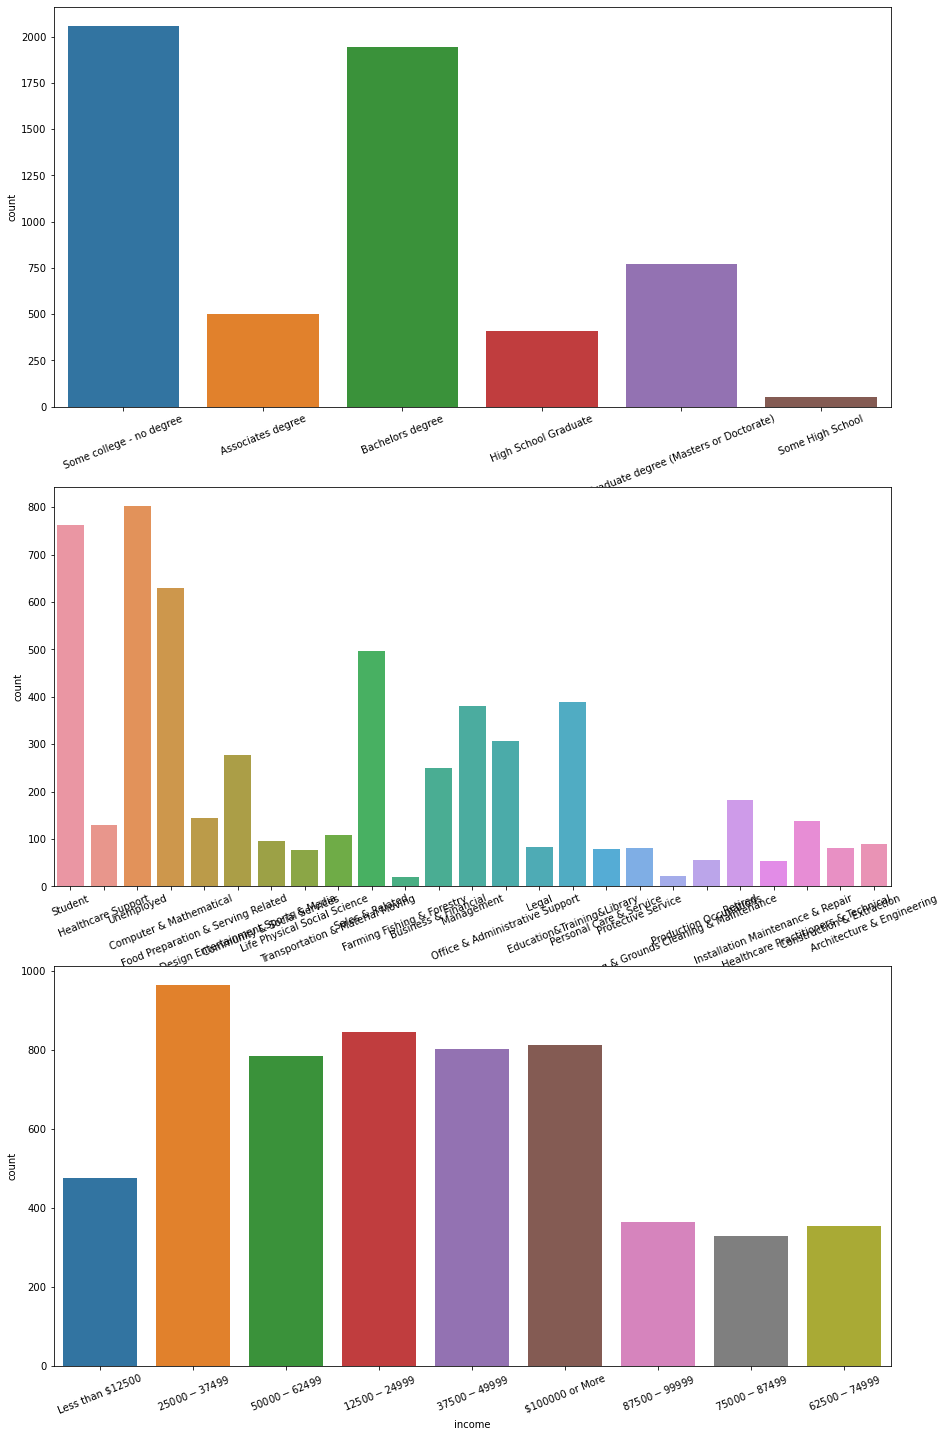

In [271]:
#Analysis only on guest who visited the mall

dfVisited = df[df['Y']==1]

plt.figure(figsize=(15,50))
for i in list(enumerate(catCol)):
    plt.subplot(10,2,i[0]+1)
    sns.countplot(dfVisited[i[1]])
    plt.xticks(rotation=10)
plt.show()


plt.figure(figsize=(15,25))
for i in list(enumerate(catCol2)):
    plt.subplot(3,1,i[0]+1)
    sns.countplot(dfVisited[i[1]])
    plt.xticks(rotation=22)
plt.show()



In [272]:
df['income'].value_counts()

$25000 - $37499     1618
$12500 - $24999     1460
$37500 - $49999     1437
$100000 or More     1393
$50000 - $62499     1316
Less than $12500     816
$87500 - $99999      701
$75000 - $87499      695
$62500 - $74999      663
Name: income, dtype: int64

In [ ]:
'''OBservations Based on above Graphs'''
'''
'destination': Places described as "no urgent place" have a higher frequency of visitors.
'passenger': Those who travel "alone" are more prevalent visitors.
'weather': Visitation tends to increase when it is "sunny."
'temperature': The presence of more visitors is associated with a temperature of 55 degrees.
'time': Evening hours are considered the best time to visit the mall.
'coupon': Restaurants with prices less than 20, coffee houses, carry-out, and take-away establishments attract a larger customer base.
'age': Individuals below the age of 31 constitute a higher proportion of visitors.
'maritalStatus': Both single and married individuals visit more frequently.
'has_children': Those without children are more likely to visit.
'Bar': The category labeled as "'Never'" has a higher number of customers.
'CoffeeHouse': Categories less than 1 and 1-3 have a larger customer base.
'CarryAway': Categories 4-8 and 1-3 attract more customers.
'RestaurantLessThan20': Category 1-3 has a higher customer count.
'Restaurant20To50': Category less than 1 has a larger number of customers.
'education': Individuals with no degree and a college degree visit more often.
'income': Those with incomes between $12,500 - $62,499 and $100,000 or more constitute the majority of mall visitors.
'''

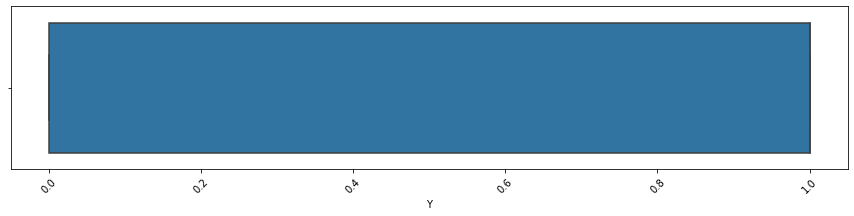

In [273]:
# Outlier Detection
plt.figure(figsize=(15,3))

sns.boxplot(x=df['Y'])
plt.xticks(rotation=45) 
plt.show() 



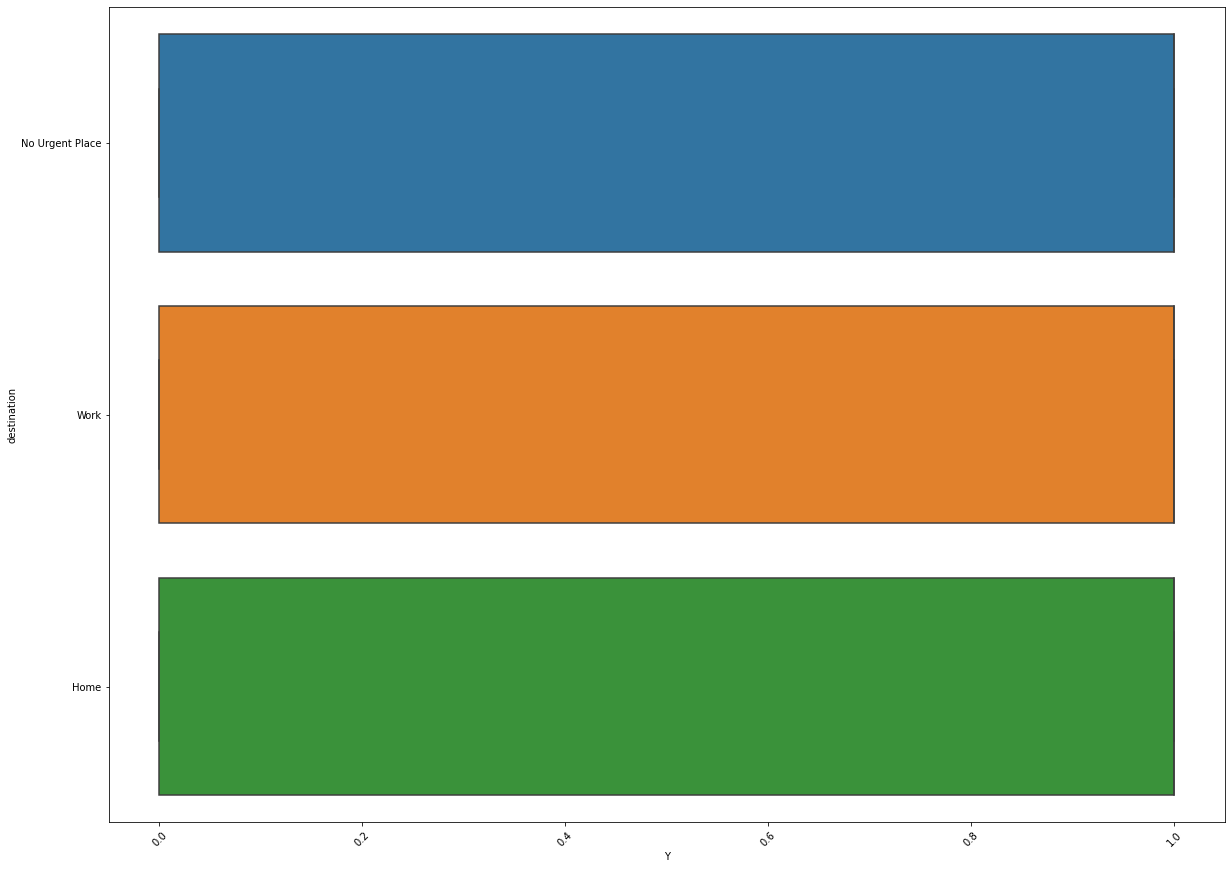

In [276]:
plt.figure(figsize=(20,15))
sns.boxplot(y=df['destination'],x=df['Y'])
plt.xticks(rotation=45)
plt.show() 


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

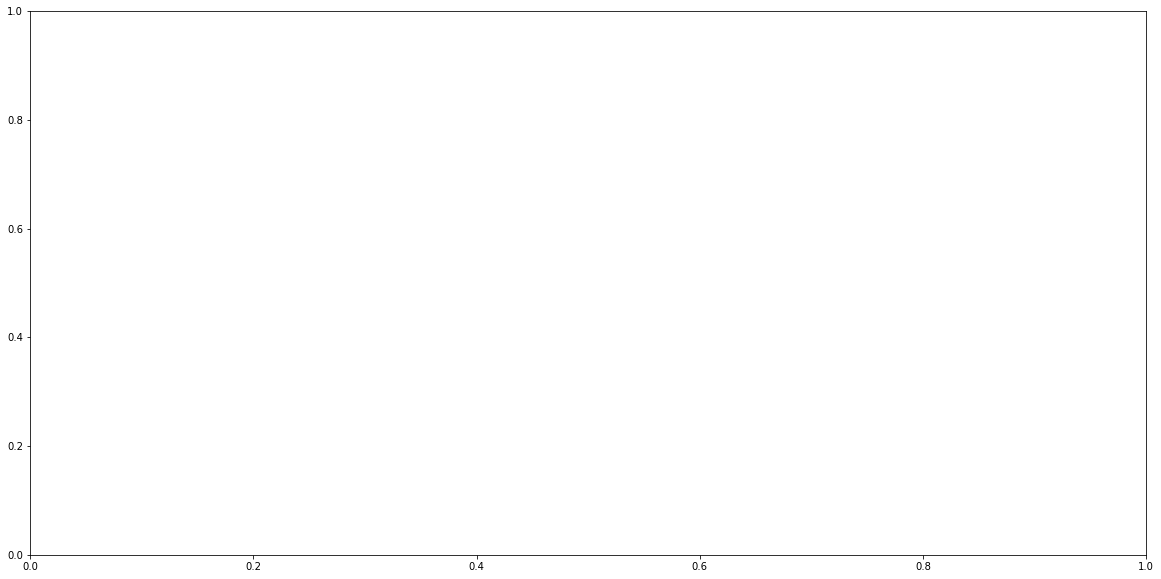

In [277]:

plt.figure(figsize=(20,10))
sns.kdeplot(x=df['destination'])

